In [1]:
import os
from pathlib import Path

import json

## Importation des données et tests

In [2]:
root = str(Path(os.getcwd()).absolute().parent)
os.chdir(root)

In [3]:
root

'/Users/maximebonnin/Documents/Projects/SCOR/Datathon'

In [4]:
import pandas as pd
import numpy as np

from tqdm.notebook import tqdm, trange

from Environnement.merge import add_key_str

from Environnement.clean import main_clean

In [5]:
pathData = Path('Data/RawData')
pathSubmission = Path('Data/03_Prediction')

In [6]:
season = "Kharif"
Kharif = pd.read_csv(pathSubmission / f"GP_Pred_{season}_ID.csv")

season = "Rabi"
Rabi = pd.read_csv(pathSubmission / f"GP_Pred_{season}_ID.csv")

In [24]:
Kharif

,index,key,State,District,Sub-District,Block,GP,Cluster
0,0,andhra pradesh_anantapur_agali__agali,andhra pradesh,anantapur,agali,NaN,agali,NaN
1,1,andhra pradesh_anantapur_agali__akkagaladevara...,andhra pradesh,anantapur,agali,NaN,akkagaladevarahalli,NaN
2,2,andhra pradesh_anantapur_agali__hulikeradevara...,andhra pradesh,anantapur,agali,NaN,hulikeradevarahalli,NaN
3,3,andhra pradesh_anantapur_agali__inagalore,andhra pradesh,anantapur,agali,NaN,inagalore,NaN
4,4,andhra pradesh_anantapur_agali__kodihalli,andhra pradesh,anantapur,agali,NaN,kodihalli,NaN
...,...,...,...,...,...,...,...,...
285036,285036,uttar pradesh_sitapur_behta_rohiya shivpur_ram...,uttar pradesh,sitapur,behta,rohiya shivpur,ramuwapur,NaN
285037,285037,uttar pradesh_hamirpur_sarila_jalalpur_kupara,uttar pradesh,hamirpur,sarila,jalalpur,kupara,NaN
285038,285038,uttar pradesh_hamirpur_maudaha_bhulsi_bhulsi,uttar pradesh,hamirpur,maudaha,bhulsi,bhulsi,NaN
285039,285039,uttar pradesh_hamirpur_sarila_jalalpur_bhendid...,uttar pradesh,hamirpur,sarila,jalalpur,bhendidanda,NaN


In [25]:
Rabi

,index,key,State,District,Sub-District,Block,GP,Cluster
0,0,andhra pradesh_anantapur_vidapanakal__,andhra pradesh,anantapur,vidapanakal,NaN,NaN,NaN
1,1,andhra pradesh_anantapur_vajrakarur__,andhra pradesh,anantapur,vajrakarur,NaN,NaN,NaN
2,2,andhra pradesh_anantapur_gooty__,andhra pradesh,anantapur,gooty,NaN,NaN,NaN
3,3,andhra pradesh_anantapur_guntakal__,andhra pradesh,anantapur,guntakal,NaN,NaN,NaN
4,4,andhra pradesh_anantapur_pamidi__,andhra pradesh,anantapur,pamidi,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
226138,226138,uttar pradesh_agra_jaitpur kalan_kookapur_muku...,uttar pradesh,agra,jaitpur kalan,kookapur,mukutpura,NaN
226139,226139,uttar pradesh_agra_khandauli_dhaurra_rahan khurd,uttar pradesh,agra,khandauli,dhaurra,rahan khurd,NaN
226140,226140,uttar pradesh_agra_kheragarh_sitouli_khanpur,uttar pradesh,agra,kheragarh,sitouli,khanpur,NaN
226141,226141,uttar pradesh_agra_pinahat_husainpura_ladhavapura,uttar pradesh,agra,pinahat,husainpura,ladhavapura,NaN


In [9]:
Kharif_excel = list()
Rabi_excel = list()
for season in ["Kharif", "Rabi"]:
    for path in tqdm(pathData.glob(f"*/*_{season}.xlsx")):
        df = pd.read_excel(path)
        add_key_str(df)
        if season == "Kharif":
            Kharif_excel.extend(list(df["key_str"]))

        elif season == "Rabi":
            Rabi_excel.extend(list(df["key_str"]))


0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [10]:
print(len(set(Kharif_excel)))
print(len(set(Kharif_excel) & set(Kharif["key"])))

196587
132423


In [11]:
print(len(set(Rabi_excel)))
print(len(set(Rabi_excel) & set(Rabi["key"])))

134375
104588


In [12]:
print(len(set(Rabi_excel) & set(Rabi["key"])))

104588


In [13]:
missedRabi = set(Rabi_excel) - set(Rabi["key"])
missedKharif = set(Kharif_excel) - set(Kharif["key"])

In [14]:
missedRabi

{'telangana_mancherial_nan_vemanpalle_baddampalle',
 'telangana_kamareddy_nan_pitlam_pitlam',
 'odisha_puri_nan_kakatpur_othaka',
 'maharashtra_nashik_nasik_satpur_',
 'telangana_medak_nan_narsapur_yellapur',
 'andhra pradesh_east godavari_312_mandapeta_vemulapalle',
 'telangana_kamareddy_nan_tadwai_tadwai',
 'rajasthan_bhilwara_mandalgarh_c:anuh_lqjkl',
 'rajasthan_bharatpur_bharatpur_kksjeqbz_eagxk;k',
 'rajasthan_jaipur_jamwa ramgarh_ताला_राजपुरवासताला',
 'rajasthan_jaisalmer_jaisalmer_eksgux<+_eksgux<+',
 'andhra pradesh_east godavari_493_rajavommangi_velagalapalem',
 'telangana_peddapalli_nan_elgaid_',
 'rajasthan_dausa_lalsot_fmmokuk_[kvqecj',
 'telangana_jayashankar_nan_malharrao_domalamandaram',
 'rajasthan_jaipur_chomu_गोविन्दगढ_मलिकपुर',
 'rajasthan_bhilwara_bhilwara_iqj_iqj&izfke',
 'telangana_nalgonda_nan_damaracherla_veerlapalem',
 'andhra pradesh_east godavari_nan__',
 'karnataka_dakshina kannada_putturu_uppinaangadi/kadaba_kobaaru',
 'rajasthan_bharatpur_kaman_lrokl_oknh

In [15]:
missedKharif

{'telangana_karimnagar_shankarapatnam__',
 'gujarat_dahod_nan_fatepura_lakhanpur',
 'rajasthan_tonk_malpura_eksjyk_dpksfy;k',
 'bihar_gopalganj_nan_baikunthpur_usaree',
 'odisha_gajapatti_nan_r.udayagiri_dabarguda',
 'gujarat_devbhoomi dwarka_nan_khambhlia_lalparada',
 'gujarat_ahmedabad_nan_mandal_nvagam',
 'telangana_adilabad_nan_adilabad_yapalguda',
 'odisha_puri_nan_kakatpur_othaka',
 'gujarat_rajkot_nan_vinchhiya_sartanpar',
 'odisha_nayagarh_nan_ranpur_brajarajapur',
 'gujarat_patan_nan_saraswati_bhatsan',
 'bihar_gaya_nan_belaganj_paeebigaha',
 'telangana_medak_nan_narsapur_yellapur',
 'telangana_jayashankar_nan_venkatapuram_edhira [g]',
 'gujarat_rajkot_nan_vinchhiya_hingolgadh',
 'telangana_jangaon_nan_gundala_kachanapalle',
 'telangana_mahbubnagar_maddur__kamalayapalle',
 'gujarat_surendranagar_nan_dasada_kharaghoda',
 'telangana_kamareddy_nan_tadwai_tadwai',
 'odisha_bargarh_nan_bijepur_samaleipadar',
 'rajasthan_bhilwara_mandalgarh_c:anuh_lqjkl',
 'odisha_mayurbhanj_nan_bij

In [26]:
missedRabi = set(Rabi["key"]) - set(Rabi_excel)
missedKharif = set(Kharif["key"]) - set(Kharif_excel)

In [27]:
print(len(missedRabi))
print(len(missedKharif))

121555
152618


In [28]:
missedRabi

{'andhra pradesh_prakasam_komarole__chinthalapalli',
 'uttar pradesh_azamgarh_azmatgarh_jamaluddin patti_sokahna khalsa',
 'uttar pradesh_moradabad_chhajlet_kuchawali_kura meerpur',
 'tamil nadu_cuddalore_nallur_tittagudi (e)_athamangalam',
 'karnataka_koppal_koppal_irkalagada_irkalgada',
 'uttar pradesh_bijnor_nehtaur_mustafabad_shekhpuralala',
 'tamil nadu_thiruvannamalai_anakkavur_anakavoor_thavasi',
 'madhya pradesh_chhatarpur__bijawar_राईपुरा',
 'madhya pradesh_satna_majhgawa_chitrakut(kamta)_pathra',
 'uttar pradesh_meerut_daurala_pavli khurd_pavli khurd',
 'uttar pradesh_bijnor_kotwali_benipur_kishanpurkunda',
 'rajasthan_ajmer_vjkbz_vkdksfm;k_xksfb;kuk',
 'madhya pradesh_shajapur_shajapur_maksi_siroliya',
 'rajasthan_bharatpur_dkeka_xkaomh_ckeuh',
 'uttar pradesh_kushinagar_motichak_turkaha_pakari',
 'uttar pradesh_bahraich_mihinpurwa_laukahi_pounda',
 'tamil nadu_cuddalore_virudhachalam_virudhachalam (n)_pudhukooraipettai',
 'uttar pradesh_ballia_revati_udaha_bhopatpur',
 'mad

In [29]:
missedKharif

{'madhya pradesh_chhindwara_chand_chand_khairirani',
 'uttar pradesh_azamgarh_azmatgarh_jamaluddin patti_sokahna khalsa',
 'uttar pradesh_moradabad_chhajlet_kuchawali_kura meerpur',
 'west bengal_paschim medinipur__sankrail_chhatri',
 'uttar pradesh_bijnor_nehtaur_mustafabad_shekhpuralala',
 'madhya pradesh_balaghat_katangi_katangi_chichgaon',
 'rajasthan_bharatpur_बयाना_खोहरा_खेडलीगडासिया',
 'odisha_mayurbhanj__kusumi_bhutukabadi',
 'telangana_mancherial_kotapalle_kotapalle_rampur',
 'uttar pradesh_meerut_daurala_pavli khurd_pavli khurd',
 'uttar pradesh_bijnor_kotwali_benipur_kishanpurkunda',
 'gujarat_surat__choryasi_popda',
 'chhattisgarh_bijapur_bhopalpattnam_bhopalpattnam_dampaya',
 'uttar pradesh_kushinagar_motichak_turkaha_pakari',
 'uttar pradesh_bahraich_mihinpurwa_laukahi_pounda',
 'andhra pradesh_visakhapatnam_anandapuram__gambheeram',
 'uttar pradesh_ballia_revati_udaha_bhopatpur',
 'rajasthan_baran_अन्ता_बडवा_बिजोरा',
 'west bengal_purulia__jhalda-ii_',
 'rajasthan_gangan

## Slicing the prediction files in three parts

In [38]:
season = "Kharif"
Kharif = pd.read_csv(pathSubmission / f"GP_Pred_{season}_ID.csv")

N_Kharif = len(Kharif)
for i in range(4):
    df = Kharif.iloc[i * N_Kharif // 4 : (i + 1) * N_Kharif // 4]
    df.to_excel(pathSubmission / f"GP_Pred_{season}_ID_{i+1}.xlsx", index=False)

season = "Rabi"
Rabi = pd.read_csv(pathSubmission / f"GP_Pred_{season}_ID.csv")

N_Rabi = len(Rabi)
for i in range(4):
    df = Rabi.iloc[i * N_Rabi // 4 : (i + 1) * N_Rabi // 4]
    df.to_excel(pathSubmission / f"GP_Pred_{season}_ID_{i+1}.xlsx", index=False)

# save the data in three different files for each season



In [8]:
import time
from googletrans import Translator
translator = Translator()

translated_text = []
count = 0
grams = ['Hello my name is Zac.', 'Google translate is easy to use.']

for g in grams:
    translated_text.append(
        translator.translate(g, dest='es', src='en')
    )
for t in translated_text:
    print(
        'English: ', t.origin, '  ----->  ',
        'Spanish: ', t.text
    )

English:  Hello my name is Zac.   ----->   Spanish:  Hola mi nombre es Zac.
English:  Google translate is easy to use.   ----->   Spanish:  El traductor de Google es fácil de usar.


In [34]:
text_hindi = "बाडमेर"
text_hindi = "a_"

# change to english alphabet
text_hindi.isalpha()
text_hindi.isalnum()


False

In [9]:
cols = ["State", "District", "Sub-District", "Block","GP"]

def line_alnum(infos):
    return not np.all([str(info).isalnum()  for i, info in enumerate(infos) if i != 0])


def line_alnum_bis(key):
    return not np.all([info.isalnum()  for info in key.split("_")])


def translate_line(translator, infos, bool, dest="en"):

    if bool:
        return infos
    
    infos_translated = []

    for info in infos.split("_"):
        if info.isalnum():
            infos_translated.append(info)
        else:
            infos_translated.append(translator.translate(str(info), dest=dest).text)


    return "_".join(infos_translated)

# season = "Rabi"
# Rabi = pd.read_csv(pathSubmission / f"GP_Pred_{season}_ID.csv")


In [10]:
Kharif["bool"] = Kharif.apply(lambda x: line_alnum_bis(x["key"]), axis=1)

In [11]:
len(Kharif[Kharif["bool"]==False])

29899

In [12]:
new_keys = []

for i in trange(len(Kharif)):
    
    row = Kharif.iloc[i]
    # print(row["bool"])
    # print(row["key"])
    if row["bool"]:
        new_keys.append(row["key"])
    else:
        new_keys.append(translate_line(translator, row["key"], row["bool"]))


Kharif["key"] = new_keys

  0%|          | 0/285041 [00:00<?, ?it/s]

In [13]:
# retrieve location information
Kharif["State"] = Kharif.apply(lambda x: x["key"].split("_")[0], axis=1)
Kharif["District"] = Kharif.apply(lambda x: x["key"].split("_")[1], axis=1)
Kharif["Sub-District"] = Kharif.apply(lambda x: x["key"].split("_")[2], axis=1)
Kharif["Block"] = Kharif.apply(lambda x: x["key"].split("_")[3], axis=1)
Kharif["GP"] = Kharif.apply(lambda x: x["key"].split("_")[4], axis=1)

In [ ]:
Rabi["key"] = Rabi.apply(lambda x: translate_line(translator, x["key"], x["bool"]), axis=1)
Rabi

In [14]:
# save new data in a new file
season = "Kharif"
Kharif.to_csv(pathSubmission / f"GP_Pred_{season}_ID_translated.csv", index=False)

In [103]:
Rabi[Rabi["Sub-District"]=="Sheo"]

,index,key,State,District,Sub-District,Block,GP,Cluster,bool


In [54]:
'_'.join(["_denj", 'bhbfe'])

'_denj_bhbfe'

In [52]:
Rabi.loc[Rabi["bool"] == True]["Sub-District"]=="Barmer"


False    13225
Name: Sub-District, dtype: int64

### Test du matching

In [24]:
data2019_Kharif = pd.read_csv(Path("Data/RawDataUnified") / "RawData_2019_Kharif")
submission_Kharif = pd.read_csv("Data/03_Prediction/GP_Pred_Kharif_ID_translated.csv")

/opt/homebrew/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [27]:
print(len(submission_Kharif))

285041


In [29]:
data2019_Kharif = add_key_str(data2019_Kharif)
print(len(data2019_Kharif))

372909


## Trouver les clusters les plus intelligents

In [157]:
from sklearn.metrics import hamming_loss, jaccard_score

def get_closest_keys(key, df):

    state, district, subDistrict, block, GP = key.split("_") 
    df_State = df[df["State"].str.contains(state)]
    df_District = df_State[df_State["District"].str.contains(district)]
    df_SubDistrict = df_District[df_District["SubDistrict"].str.contains(subDistrict)]
    df_Block = df_SubDistrict[df_SubDistrict["Block"].str.contains(block)]
    df_GP = df_Block[df_Block["GP"].str.contains(GP)]

    if len(df_GP)>0:
        return df_GP

    elif len(df_Block)>0:
        return df_Block

    elif len(df_SubDistrict)>0:
        return df_SubDistrict

    elif len(df_District)>0:
        return df_District

    elif len(df_State)>0:
        return df_State

def get_closest_keys_scoring(key, df, score_fn):

    cols = ["State", "District", "SubDistrict", "Block", "GP"]
    state, district, subDistrict, block, GP = key.split("_") 
    df_State = df[df["State"] == state].copy()
    df_District = df_State[df_State["District"] == district].copy()
    df_SubDistrict = df_District[df_District["SubDistrict"] == subDistrict].copy()
    df_Block = df_SubDistrict[df_SubDistrict["Block"] == block].copy()
    df_GP = df_Block[df_Block["GP"] == GP].copy()
    
    if len(df_GP)>0:
        # In this case, we have exact matches
        return df_GP

    elif len(df_Block)>0:
        df_Block["score"] = df_Block.apply(lambda x: score_fn(x[cols], np.array([state, district, subDistrict, block, GP])), axis=1)
        # Return the closest keys in the state regarding score_fn
        best = df_Block.sort_values(by=["score"], ascending=False).iloc[0]["score"]
        return df_Block[df_Block["score"]==best].drop(["score"], axis=1)

    elif len(df_SubDistrict)>0:
        df_SubDistrict["score"] = df_SubDistrict.apply(lambda x: score_fn(x[cols], np.array([state, district, subDistrict, block, GP])), axis=1)
        # Return the closest keys in the state regarding score_fn
        best = df_SubDistrict.sort_values(by=["score"], ascending=False).iloc[0]["score"]
        return df_SubDistrict[df_SubDistrict["score"]==best].drop(["score"], axis=1)

    elif len(df_District)>0:
        df_District["score"] = df_District.apply(lambda x: score_fn(x[cols], np.array([state, district, subDistrict, block, GP])), axis=1)
        # Return the closest keys in the state regarding score_fn
        best = df_District.sort_values(by=["score"], ascending=False).iloc[0]["score"]
        return df_District[df_District["score"]==best].drop(["score"], axis=1)

    elif len(df_State)>0:
        df_State["score"] = df_State.apply(lambda x: score_fn(x[cols], np.array([state, district, subDistrict, block, GP])), axis=1)
        # Return the closest keys in the state regarding score_fn
        best = df_State.sort_values(by=["score"], ascending=False).iloc[0]["score"]
        return df_State[df_State["score"]==best].drop(["score"], axis=1)

    else:
        df_bis = df.copy()
        df_bis["score"] = df_bis.apply(lambda x: score_fn(x[cols], np.array([state, district, subDistrict, block, GP])), axis=1)
        # Return the closest keys in the state regarding score_fn
        best = df_bis.sort_values(by=["score"], ascending=False).iloc[0]["score"]
        return df_bis[df_bis["score"]==best].drop(["score"], axis=1)

    




In [28]:
df_kharif = pd.DataFrame(Kharif_excel, columns=["key_str"])
df_rabi = pd.DataFrame(Rabi_excel, columns=["key_str"])

# retrieve State, District, SubDistrict, Block, GP
for df_season in [df_kharif, df_rabi]:
    df_season["State"] = df_season["key_str"].apply(lambda x: x.split("_")[0])
    df_season["District"] = df_season["key_str"].apply(lambda x: x.split("_")[1])
    df_season["SubDistrict"] = df_season["key_str"].apply(lambda x: x.split("_")[2])
    df_season["Block"] = df_season["key_str"].apply(lambda x: x.split("_")[3])
    df_season["GP"] = df_season["key_str"].apply(lambda x: x.split("_")[4])


In [41]:
key = "andhra pradesh_anantapur_agali__"

In [45]:
results = get_closest_keys(key, df_kharif)
results

,key_str,State,District,SubDistrict,Block,GP
321213,andhra pradesh_anantapur_agali__agali,andhra pradesh,anantapur,agali,,agali
321214,andhra pradesh_anantapur_agali__akkagaladevara...,andhra pradesh,anantapur,agali,,akkagaladevarahalli
321215,andhra pradesh_anantapur_agali__hulikeradevara...,andhra pradesh,anantapur,agali,,hulikeradevarahalli
321216,andhra pradesh_anantapur_agali__inagalore,andhra pradesh,anantapur,agali,,inagalore
321217,andhra pradesh_anantapur_agali__kodihalli,andhra pradesh,anantapur,agali,,kodihalli
321218,andhra pradesh_anantapur_agali__madhudi,andhra pradesh,anantapur,agali,,madhudi
321219,andhra pradesh_anantapur_agali__narasambudi,andhra pradesh,anantapur,agali,,narasambudi
321220,andhra pradesh_anantapur_agali__p.byadigera,andhra pradesh,anantapur,agali,,p.byadigera
321221,andhra pradesh_anantapur_agali__ravudi,andhra pradesh,anantapur,agali,,ravudi
339813,andhra pradesh_anantapur_agali__,andhra pradesh,anantapur,agali,,


In [158]:
key = "andhra pradesh____agali"
results = get_closest_keys_scoring(key, df_kharif, hamming_loss)
results

,key_str,State,District,SubDistrict,Block,GP
321214,andhra pradesh_anantapur_agali__akkagaladevara...,andhra pradesh,anantapur,agali,,akkagaladevarahalli
321215,andhra pradesh_anantapur_agali__hulikeradevara...,andhra pradesh,anantapur,agali,,hulikeradevarahalli
321216,andhra pradesh_anantapur_agali__inagalore,andhra pradesh,anantapur,agali,,inagalore
321217,andhra pradesh_anantapur_agali__kodihalli,andhra pradesh,anantapur,agali,,kodihalli
321218,andhra pradesh_anantapur_agali__madhudi,andhra pradesh,anantapur,agali,,madhudi
...,...,...,...,...,...,...
788108,andhra pradesh_anantapur_tadpatri__,andhra pradesh,anantapur,tadpatri,,
788109,andhra pradesh_anantapur_uravakonda__,andhra pradesh,anantapur,uravakonda,,
788110,andhra pradesh_anantapur_vajrakarur__,andhra pradesh,anantapur,vajrakarur,,
788111,andhra pradesh_anantapur_vidapanakal__,andhra pradesh,anantapur,vidapanakal,,


In [160]:
def comparison(preds, trues):
    preds = np.array(preds)
    trues = np.array(trues)
    # print(preds.shape)
    loss = 0
    for i in range(len(preds)):
        n,m = len(preds[i]), len(trues[i])
        if m==0 and n==0:
            continue

        elif n==0:
            loss +=1
            continue

        elif m==0:
            loss +=1
            continue

        elif n>m:
            # print(preds[i])
            preds[i] = preds[i][:m]
            # print("preds", preds[i])

            
        elif m>n:
            # print(trues[i])
            trues[i] = trues[i][:n]
        #     print("trues", trues[i])
        # print("loss", loss)

        # print(len(preds[i]), len(trues[i]))
        loss += (np.sum(np.array(list(preds[i])) == np.array(list(trues[i])))+ np.abs(n-m))/max(n,m)
    return loss

preds = "andhra pradesh_anantapur_agali__"
trues = "andhra pradesh_ananta_agali__"

comparison(preds.split("_"), trues.split("_"))

3.0

In [161]:

df_kharif["Cluster"] = [np.random.randint(0,10) for i in range(len(df_kharif))]
key = "andhra pradesh_anantapur_gandlpent__"
results = get_closest_keys_scoring(key, df_kharif, comparison)
results

,key_str,State,District,SubDistrict,Block,GP,Cluster
321414,andhra pradesh_anantapur_gandlapenta__chamache...,andhra pradesh,anantapur,gandlapenta,,chamachenubylu,3
321415,andhra pradesh_anantapur_gandlapenta__chamalag...,andhra pradesh,anantapur,gandlapenta,,chamalagondi,7
321416,andhra pradesh_anantapur_gandlapenta__gandlapenta,andhra pradesh,anantapur,gandlapenta,,gandlapenta,8
321417,andhra pradesh_anantapur_gandlapenta__godduvel...,andhra pradesh,anantapur,gandlapenta,,godduvelagala,3
321418,andhra pradesh_anantapur_gandlapenta__jeenulak...,andhra pradesh,anantapur,gandlapenta,,jeenulakunta,2
321419,andhra pradesh_anantapur_gandlapenta__kamatham...,andhra pradesh,anantapur,gandlapenta,,kamathampalle,0
321420,andhra pradesh_anantapur_gandlapenta__kurumamidi,andhra pradesh,anantapur,gandlapenta,,kurumamidi,1
321421,andhra pradesh_anantapur_gandlapenta__maddivar...,andhra pradesh,anantapur,gandlapenta,,maddivarigondi,8
321422,andhra pradesh_anantapur_gandlapenta__maduguva...,andhra pradesh,anantapur,gandlapenta,,maduguvanigondi,7
321423,andhra pradesh_anantapur_gandlapenta__malameed...,andhra pradesh,anantapur,gandlapenta,,malameedapalle,9


In [173]:
clusters_values = results["Cluster"].value_counts(ascending=False, normalize=True)

In [169]:
print(results["Cluster"].value_counts(ascending=False).index)
print(results["Cluster"].value_counts(ascending=False).values)
results["Cluster"].value_counts(ascending=False)

Int64Index([3, 8, 1, 6, 4, 0, 9, 5, 7, 2], dtype='int64')
[5 5 5 5 5 4 3 3 2 2]


3    5
8    5
1    5
6    5
4    5
0    4
9    3
5    3
7    2
2    2
Name: Cluster, dtype: int64

## Graphics sur les indicateurs

In [21]:
Kharif.query("key == 'uttar pradesh_sant ravi das nagar_aurai_ramapur_kharhgpur'")

,key,State,District,Sub-District,Block,GP,Cluster
271429,uttar pradesh_sant ravi das nagar_aurai_ramapu...,uttar pradesh,sant ravi das nagar,aurai,ramapur,kharhgpur,NaN


In [6]:
for path in tqdm(pathData.glob(f"*/*.xlsx"), total=len(list(pathData.glob(f"*/*.xlsx")))):
        df = pd.read_excel(path)
        name = str(path).split("/")[-1].replace(".xlsx", "") + ".json"
        _, stats = main_clean(df, return_stats=True)

        with open(pathData / f"stats/{name}", "w") as f:
            json.dump(stats, f)
        


  0%|          | 0/80 [00:00<?, ?it/s]

In [8]:
stats = {"Kharif": {}, "Rabi": {}}
for path in tqdm(pathData.glob(f"*/*.json"), total=len(list(pathData.glob(f"*/*.json")))):

        with open(path, "r") as f:

            stats_state = json.load(f)
        year = str(path).split("/")[-1].replace(".json", "").split("_")[0]
        name = str(path).split("/")[-1].replace(".json", "").split("_")[1]
        season = str(path).split("/")[-1].replace(".json", "").split("_")[-1]
        stats[season][f"{year}_{name}"] = stats_state


stats

  0%|          | 0/80 [00:00<?, ?it/s]

{'Kharif': {'2019_Odisha': {'paddy': {'Area Sown (Ha)': nan,
    'Area Insured (Ha)': 249.34030281182407,
    'SI Per Ha (Inr/Ha)': 57752.67901946647,
    'Sum Insured (Inr)': 14629326.700793078,
    'Indemnity Level': 0.7,
    '2000 Yield': 1524.9648521989907,
    '2001 Yield': 2367.433550108147,
    '2002 Yield': 1084.5729516943043,
    '2003 Yield': 2173.691372746936,
    '2004 Yield': 2177.241395818313,
    '2005 Yield': 2268.2915645277576,
    '2006 Yield': 2232.686085075703,
    '2007 Yield': 2449.2683489545784,
    '2008 Yield': 2164.5352559480893,
    '2009 Yield': 2318.893871665465,
    '2010 Yield': 2301.76279740447,
    '2011 Yield': 1884.2149963950974,
    '2012 Yield': 3212.4648882480174,
    '2013 Yield': 2319.9671232876713,
    '2014 Yield': 3261.3170872386445,
    '2015 Yield': 2058.4103821196827,
    '2016 Yield': 3427.752820475847,
    '2017 Yield': 2463.0015212689254,
    '2018 Yield': nan},
   'cotton': {'Area Sown (Ha)': nan,
    'Area Insured (Ha)': 1011.363636363

In [12]:
columns=["Season", "Crop","Year",'Area Sown (Ha)', "Area Insured (Ha)", 'SI Per Ha (Inr/Ha)', 'Sum Insured (Inr)', 'Indemnity Level']

for year in range(2000,2019):
    columns.append(f"{year} Yield")

df = pd.DataFrame(columns=columns)
df

,Season,Crop,Year,Area Sown (Ha),Area Insured (Ha),SI Per Ha (Inr/Ha),Sum Insured (Inr),Indemnity Level,2000 Yield,2001 Yield,...,2009 Yield,2010 Yield,2011 Yield,2012 Yield,2013 Yield,2014 Yield,2015 Yield,2016 Yield,2017 Yield,2018 Yield


In [20]:
L = []
for season in stats:
    for state in stats[season]:
        name = state.split("_")[1]
        year = state.split("_")[0]
        for crop in stats[season][state]:
            vector = np.empty(len(columns), dtype=object)
            vector[0] = season
            vector[1] = crop
            vector[2] = year
            for i in range(3, len(columns)):
                vector[i] = stats[season][state][crop][columns[i]]

            L.append(vector)
            # df = df.append(pd.DataFrame(vector))


In [22]:
df = pd.DataFrame(L, columns=columns)
df

,Season,Crop,Year,Area Sown (Ha),Area Insured (Ha),SI Per Ha (Inr/Ha),Sum Insured (Inr),Indemnity Level,2000 Yield,2001 Yield,...,2009 Yield,2010 Yield,2011 Yield,2012 Yield,2013 Yield,2014 Yield,2015 Yield,2016 Yield,2017 Yield,2018 Yield
0,Kharif,paddy,2019,NaN,249.340303,57752.679019,1.462933e+07,0.7,1524.964852,2367.43355,...,2318.893872,2301.762797,1884.214996,3212.464888,2319.967123,3261.317087,2058.410382,3427.752820,2463.001521,NaN
1,Kharif,cotton,2019,NaN,1011.363636,66933.522727,6.796307e+07,0.7,NaN,NaN,...,1267.090909,1398.409091,961.090909,422.681818,426.363636,399.590909,349.227273,459.704545,460.772727,NaN
2,Kharif,ginger,2019,NaN,134.000000,215805.000000,3.027275e+07,0.7,NaN,NaN,...,8710.840000,8913.080000,5704.560000,10007.240000,9500.640000,8227.200000,6688.760000,9022.200000,8502.120000,NaN
3,Kharif,groundnut,2019,NaN,231.578947,45848.736842,1.052519e+07,0.7,NaN,NaN,...,973.907895,1059.934211,938.236842,1091.684211,1181.223684,1210.789474,1001.394737,1585.368421,1089.881579,NaN
4,Kharif,turmeric,2019,NaN,247.058824,186605.882353,4.823147e+07,0.7,NaN,NaN,...,8341.235294,11973.647059,6012.058824,8977.235294,9314.748235,8755.588235,8558.882353,8604.000000,8877.235294,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,Rabi,wheat,2018,NaN,367.938931,51651.706107,1.886823e+07,0.8,NaN,NaN,...,NaN,NaN,1508.501908,1717.019084,1581.822519,1506.847328,1468.709924,NaN,NaN,NaN
933,Rabi,bengal gram (chana),2018,NaN,380.228137,40176.612167,1.516597e+07,0.8,NaN,NaN,...,807.634981,644.897338,856.927757,989.585551,1037.980989,892.558935,867.916350,NaN,NaN,NaN
934,Rabi,mustard,2018,NaN,479.087452,29613.615970,1.407021e+07,0.8,NaN,NaN,...,862.456274,761.494297,803.825095,889.155894,898.543726,889.737643,913.878327,NaN,NaN,NaN
935,Rabi,potato,2018,NaN,68.054753,137899.798479,9.513570e+06,0.8,NaN,NaN,...,7271.250951,6517.878327,8308.326996,7145.334601,6041.406844,6780.292776,6813.802281,NaN,NaN,NaN


In [23]:
crops_Kharif = df.query("Season == 'Kharif'")["Crop"].unique()
crops_Rabi = df.query("Season == 'Rabi'")["Crop"].unique()

In [24]:
crops_Kharif[0]

'paddy'

In [63]:
INDEX = ['Area Sown (Ha)', "Area Insured (Ha)", 'SI Per Ha (Inr/Ha)', 'Sum Insured (Inr)', 'Indemnity Level','2012 Yield', '2013 Yield', '2014 Yield', '2015 Yield']

array([[<AxesSubplot:title={'center':'Area Sown (Ha)'}, xlabel='Year'>,
        <AxesSubplot:title={'center':'Area Insured (Ha)'}, xlabel='Year'>],
       [<AxesSubplot:title={'center':'SI Per Ha (Inr/Ha)'}, xlabel='Year'>,
        <AxesSubplot:title={'center':'Sum Insured (Inr)'}, xlabel='Year'>],
       [<AxesSubplot:title={'center':'Indemnity Level'}, xlabel='Year'>,
        <AxesSubplot:>]], dtype=object)

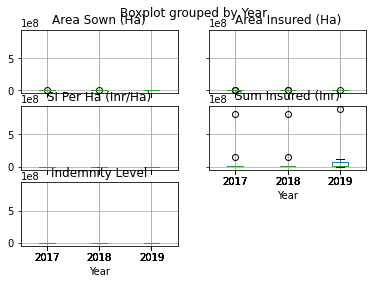

In [37]:
crop = "paddy"
df.query(f"Crop == '{crop}' & Season == 'Kharif'").boxplot(column=INDEX, by="Year")

array([[<AxesSubplot:title={'center':'Area Sown (Ha)'}>,
        <AxesSubplot:title={'center':'Area Insured (Ha)'}>],
       [<AxesSubplot:title={'center':'SI Per Ha (Inr/Ha)'}>,
        <AxesSubplot:title={'center':'Sum Insured (Inr)'}>],
       [<AxesSubplot:title={'center':'Indemnity Level'}>, <AxesSubplot:>]],
      dtype=object)

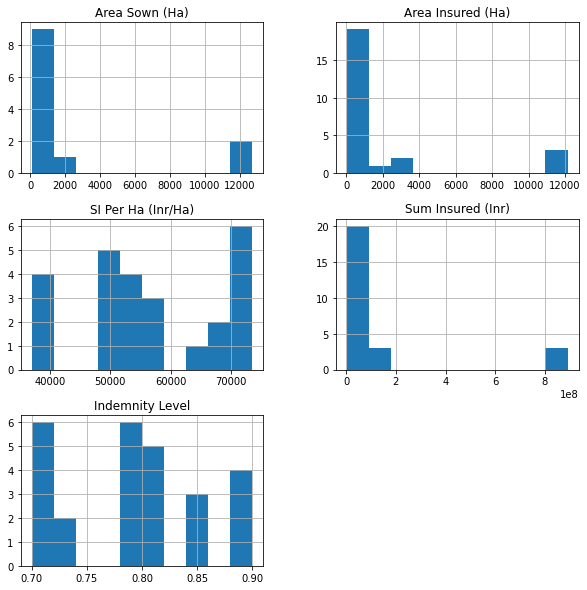

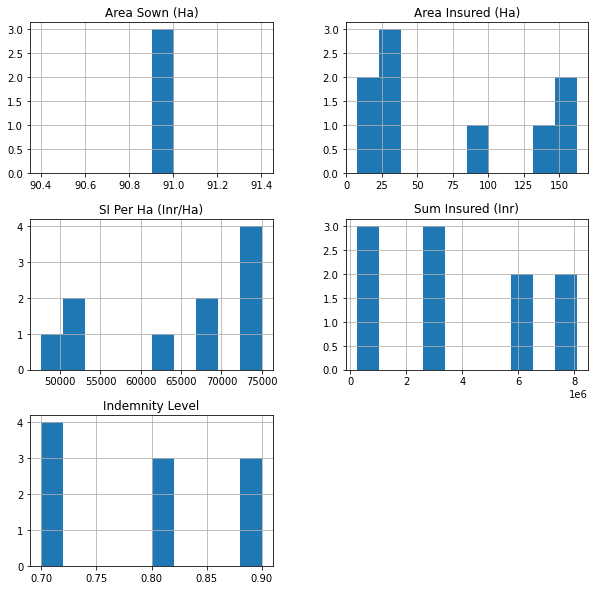

In [42]:
df.query(f"Crop == '{crop}' & Season == 'Kharif'").hist(column=INDEX, figsize=(10,10))
df.query(f"Crop == '{crop}' & Season == 'Rabi'").hist(column=INDEX, figsize=(10,10))

array([[<AxesSubplot:title={'center':'Area Sown (Ha)'}, xlabel='Crop'>,
        <AxesSubplot:title={'center':'Area Insured (Ha)'}, xlabel='Crop'>,
        <AxesSubplot:title={'center':'SI Per Ha (Inr/Ha)'}, xlabel='Crop'>],
       [<AxesSubplot:title={'center':'Sum Insured (Inr)'}, xlabel='Crop'>,
        <AxesSubplot:title={'center':'Indemnity Level'}, xlabel='Crop'>,
        <AxesSubplot:title={'center':'2012 Yield'}, xlabel='Crop'>],
       [<AxesSubplot:title={'center':'2013 Yield'}, xlabel='Crop'>,
        <AxesSubplot:title={'center':'2014 Yield'}, xlabel='Crop'>,
        <AxesSubplot:title={'center':'2015 Yield'}, xlabel='Crop'>]],
      dtype=object)

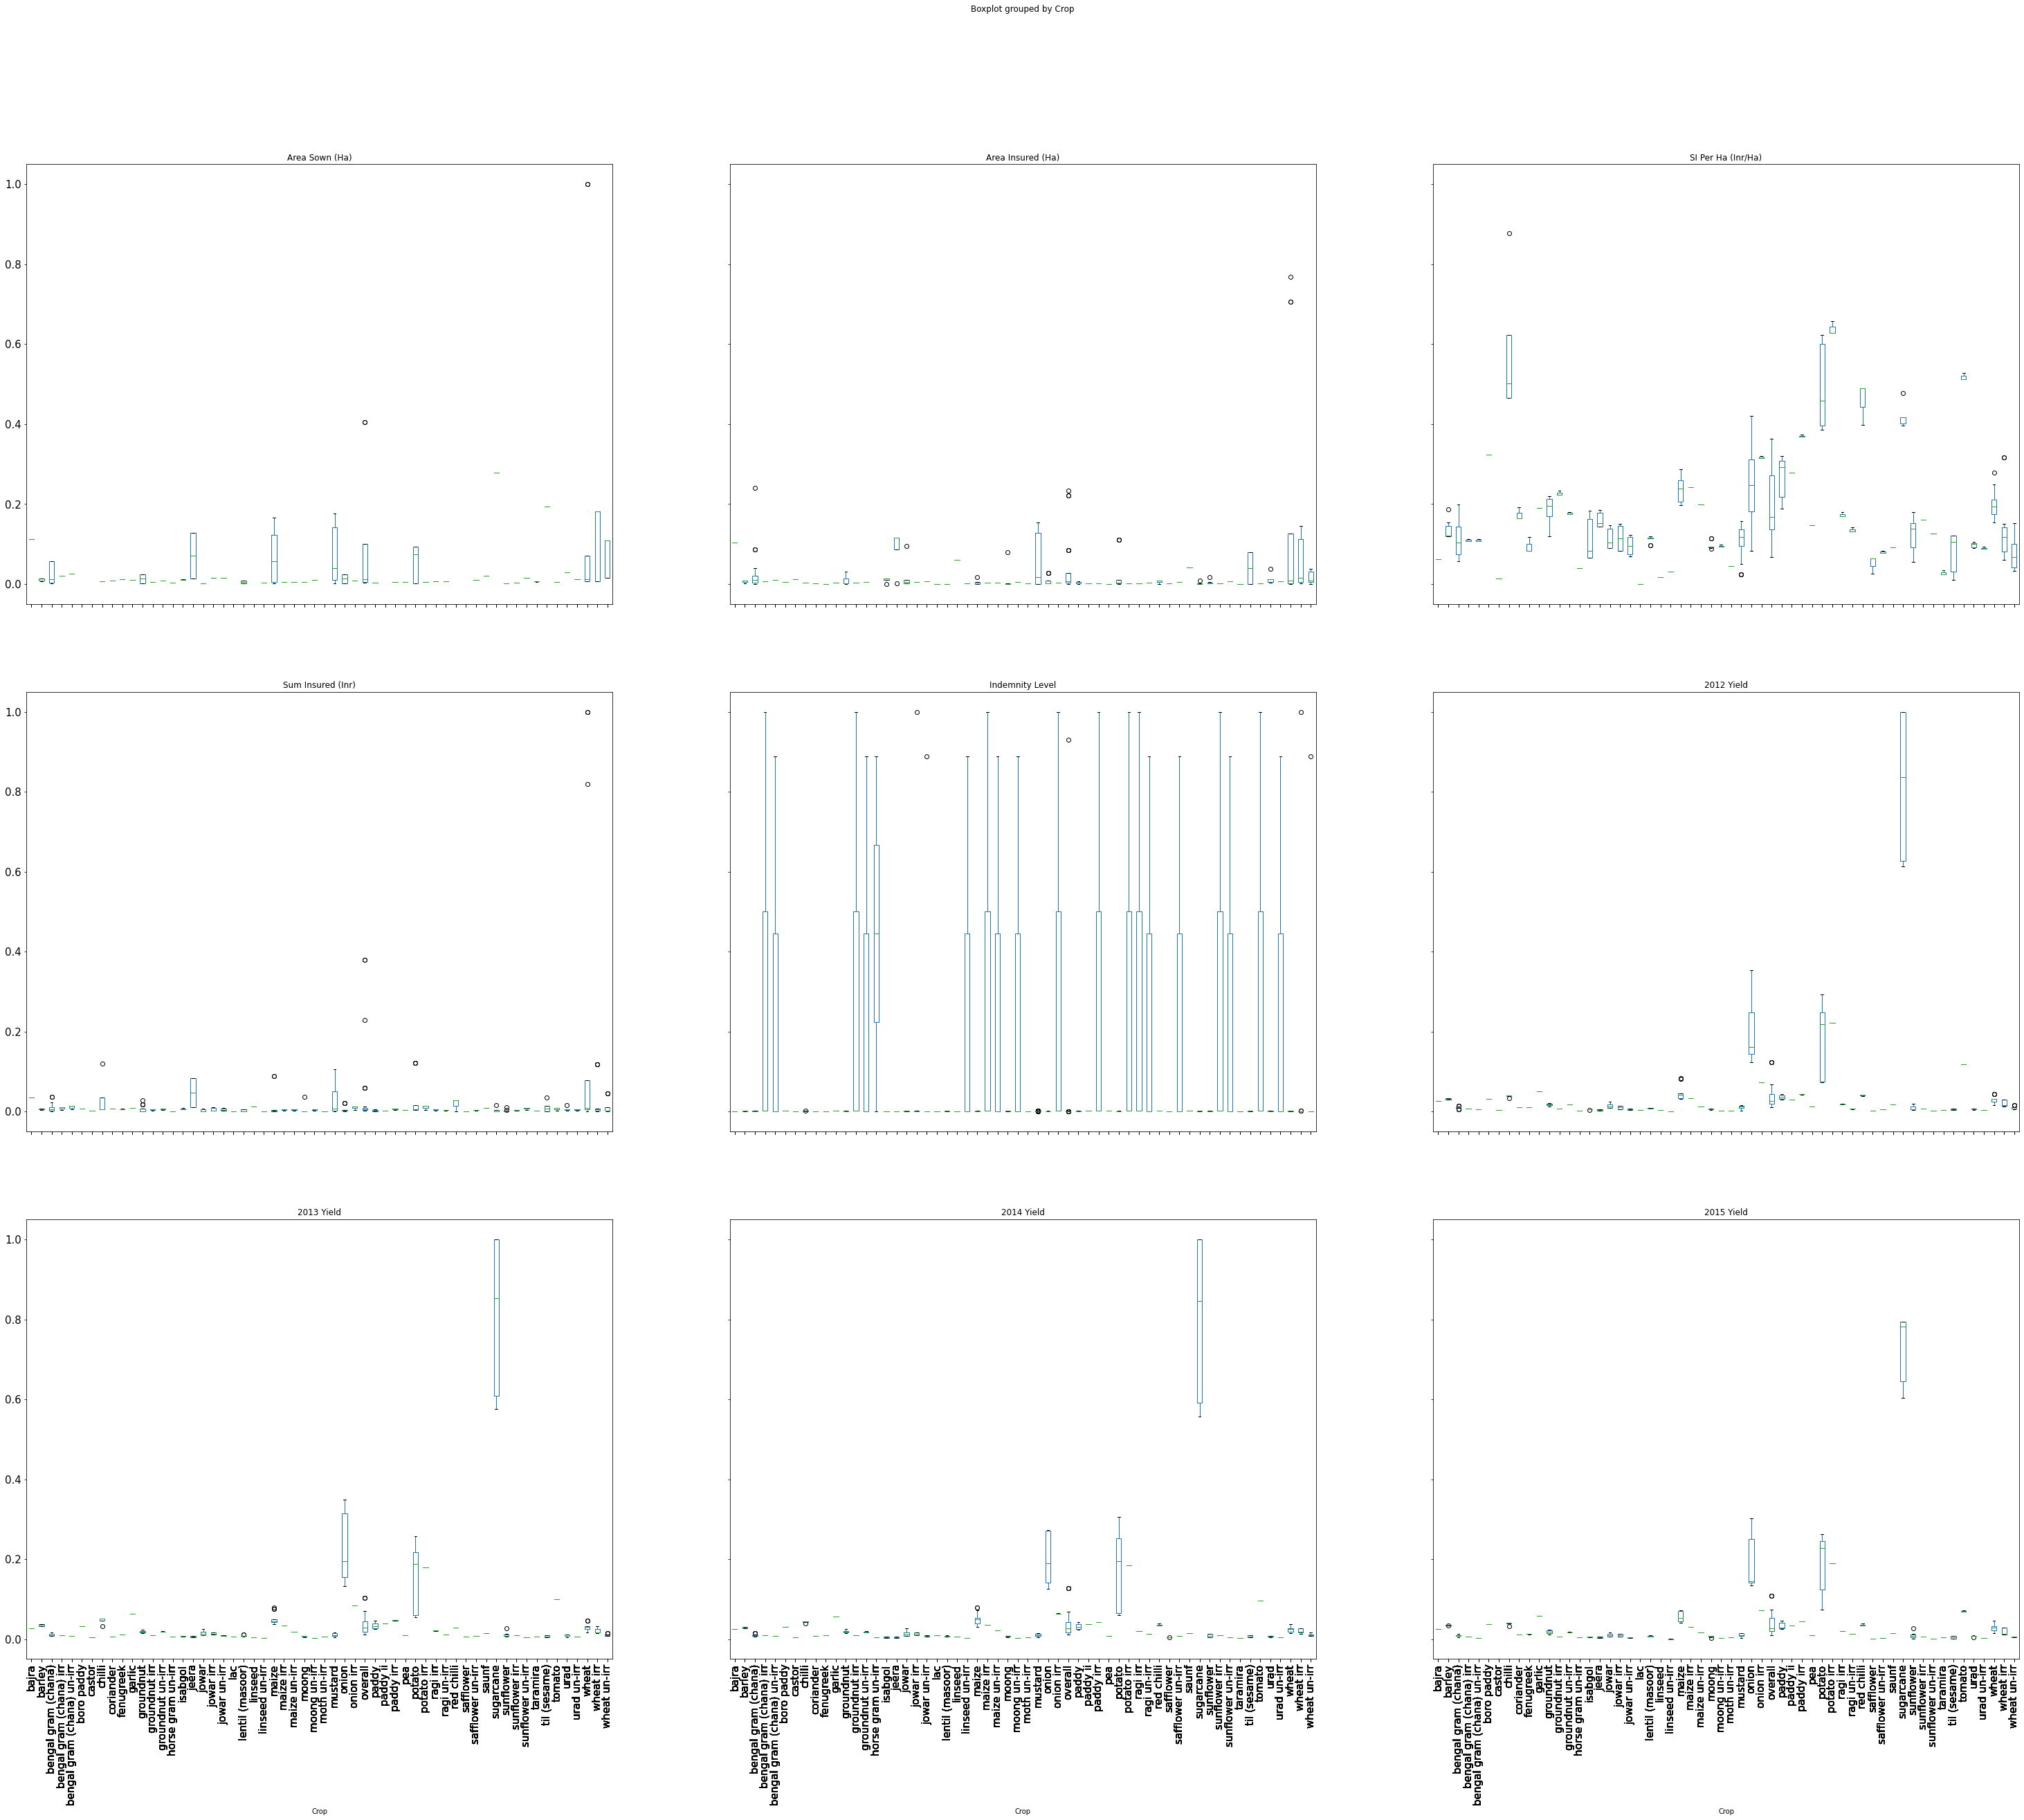

In [64]:
df[INDEX] = (df[INDEX] - df[INDEX].min()) / (df[INDEX].max() - df[INDEX].min())
# df.query(f"Season == 'Kharif'").boxplot(column=INDEX, by="Crop", figsize=(30,30), fontsize=5, rot=90)
df.query(f"Season == 'Rabi'").boxplot(column=INDEX, by="Crop", figsize=(50,40), fontsize=15, rot=90, grid=False)

## Statistiques sur les cultures

In [1]:
import pandas as pd

In [3]:
os.chdir("/Users/maximebonnin/Documents/Projects/SCOR/Datathon/")

In [10]:
df = pd.read_csv("Data/RawDataUnified/RawData_2019_Kharif")

/opt/homebrew/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [15]:
df.value_counts(subset='Crop').to_dict()

{'Paddy': 77271,
 'Maize': 44840,
 'Bajra': 35734,
 'Arhar': 29114,
 'Urad': 26160,
 'Jowar': 21577,
 'Soybean': 20667,
 'Paddy Un-IRR': 18126,
 'Groundnut': 17293,
 'Til (Sesame)': 17106,
 'Paddy IRR': 12481,
 'Rice': 10381,
 'Moong': 9211,
 'Guar Seed': 5406,
 'Aman paddy': 3248,
 'Cotton IRR': 3224,
 'Cotton': 2911,
 'Maize Un-IRR': 2045,
 'Moth': 1739,
 'Ragi Un-IRR': 1552,
 'Cotton Un-IRR': 1426,
 'Arhar Un-IRR': 1417,
 'Groundnut Un-IRR': 969,
 'Maize IRR': 963,
 'Moong Un-IRR': 629,
 'Bajra Un-IRR': 560,
 'Soybean Un-IRR': 488,
 'Cowpea': 478,
 'Sunflower Un-IRR': 430,
 'Sugarcane Ratoon': 418,
 'Ragi': 400,
 'Castor': 383,
 'Sugarcane Plant': 347,
 'Sunflower': 334,
 'Jowar Un-IRR': 325,
 'Moth Un-IRR': 278,
 'Aus Paddy': 232,
 'Til (Sesame) Un-IRR': 202,
 'Groundnut IRR': 199,
 'Jute': 197,
 'Ragi IRR': 179,
 'Tomato': 170,
 'Sunflower IRR': 164,
 'Arhar IRR': 152,
 'ONION IRR': 145,
 'Chilli IRR': 139,
 'Urad Un-IRR': 129,
 'Navane': 129,
 'Niger Seed': 128,
 'TURMERIC': 113,